In [39]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd

train_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/logistic_regression/train.csv', delimiter=',')
test_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/logistic_regression/test.csv', delimiter=',')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [18]:
from matplotlib import pyplot as plt

In [40]:
import numpy as np
train_data.shape
train_data = train_data.iloc[: , :-1]
test_data = test_data.iloc[: , :-1]
# transform our data to numpy
np_train = train_data.to_numpy()
np_train.shape
test_data = test_data.to_numpy()

# First Steps 
As the first steps, we load our data, drop the last column which we know contains nothing.


We also can look at our data in numpy format. 

For good measure, we checkout the size of our test and training arrays. 

We can see they are in 1D. We know we can represent them in 1D or 2D using a reshape command

In [8]:
test_data.shape


(10000, 1568)

In [50]:
# 2D, plus expansion (we might use for CNN)
np_train.shape

(50000, 28, 56, 1)

In [52]:
# one D representation
train_data.shape

(50000, 1568)

# Normalization
For the methods, I decided only to use black and white values. 
In this way, I cast in the below. We can see we do not see much visual difference. 

Our data looks the same. We expect increased training time by using this.

In [43]:
train_data[train_data < 0.5] = 0
train_data[train_data > 0.5] = 255

In [11]:
def pixel_mat(vec, dim1, dim2):
    pixel_mat = vec.reshape(dim1, dim2)
    return pixel_mat

Visualizing

In [42]:
one_point_without_norm = np_train[0]
one_point_without_norm[0:784]

array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -2.61599900e-26, -1.55719560e-24,  5.10875940e-26, -2.78305790e-24,
        2.43160030e-23,  5.11028580e-23, -1.30151170e-22,  1.29503900e-21,
        4.48344400e-21,  1.23999250e-19, -9.94939800e-19, -1.47505040e-19,
        3.50024220e-20,  1.38319600e-20,  7.91184300e-21, -2.13270090e-20,
       -7.02586400e-21, -3.19655220e-20, -9.20131200e-20, -5.68833370e-20,
       -1.26005940e-20, -3.99348360e-20, -4.38680630e-20, -1.05007560e-19,
       -6.09747600e-20,  

In [44]:
one_point = train_data.values[0]
one_point[0:784]

array([  0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,
         0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,
         0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,
         0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,
         0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,
         0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,
         0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,
         0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,
         0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,
         0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,
         0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,
         0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,
         0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,
         0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,
         0. ,   0. ,

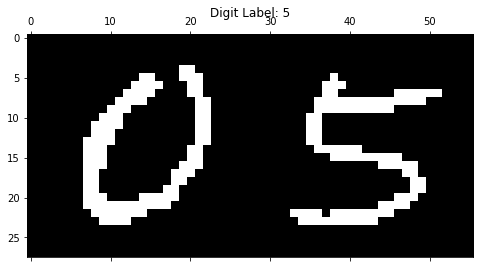

In [45]:
plt.matshow(pixel_mat(np_train[0], 28, 56), cmap=plt.cm.gray)
plt.title("Digit Label: {}".format(5))
plt.show()

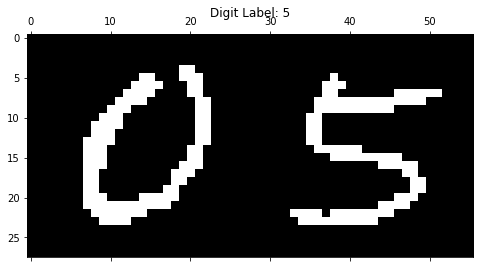

In [46]:
plt.matshow(pixel_mat(train_data.values[0], 28, 56), cmap=plt.cm.gray)
plt.title("Digit Label: {}".format(5))
plt.show()

# Alternative Representation

In [48]:
np_train = np.reshape(np_train, (50000, 28, 56, 1))
array1 = np_train[0][:,1:29]
array2 = np_train[0][:,28:56]

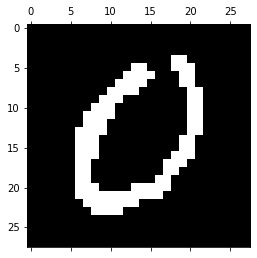

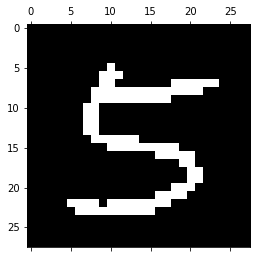

In [49]:
plt.matshow(pixel_mat(array1, 28, 28), cmap=plt.cm.gray)
plt.matshow(pixel_mat(array2, 28, 28), cmap=plt.cm.gray)

# Viewing the Normalized Data


In [29]:
train_data.head

<bound method NDFrame.head of        Feature 1  Feature 2  Feature 3  Feature 4  Feature 5  Feature 6  \
0            0.0        0.0        0.0        0.0        0.0        0.0   
1            0.0        0.0        0.0        0.0        0.0        0.0   
2            0.0        0.0        0.0        0.0        0.0        0.0   
3            0.0        0.0        0.0        0.0        0.0        0.0   
4            0.0        0.0        0.0        0.0        0.0        0.0   
...          ...        ...        ...        ...        ...        ...   
49995        0.0        0.0        0.0        0.0        0.0        0.0   
49996        0.0        0.0        0.0        0.0        0.0        0.0   
49997        0.0        0.0        0.0        0.0        0.0        0.0   
49998        0.0        0.0        0.0        0.0        0.0        0.0   
49999        0.0        0.0        0.0        0.0        0.0        0.0   

       Feature 7  Feature 8  Feature 9  Feature 10  ...  Feature 1559

In [30]:
train_data.describe()

,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,Feature 9,Feature 10,...,Feature 1559,Feature 1560,Feature 1561,Feature 1562,Feature 1563,Feature 1564,Feature 1565,Feature 1566,Feature 1567,Feature 1568
count,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,...,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.0,50000.0,50000.0,50000.0,50000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.147900,0.076500,0.030600,0.005110,0.010200,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.139493,4.416111,2.793245,1.140397,1.612745,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,255.000000,255.000000,255.000000,255.000000,255.000000,0.0,0.0,0.0,0.0,0.0


In [31]:
train_data.head(10)

,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,Feature 9,Feature 10,...,Feature 1559,Feature 1560,Feature 1561,Feature 1562,Feature 1563,Feature 1564,Feature 1565,Feature 1566,Feature 1567,Feature 1568
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Should we drop Rows with all [0]s?

# Y Data

As good practice, we should checkout our YData. In this case, it is a very imbalanced problem. We will need to deal with this in the future.


In [25]:
train_results = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/logistic_regression/train_result.csv", delimiter=',')
y_train = train_results['Class']
y_train.describe()

count    50000.000000
mean         8.909400
std          4.081108
min          0.000000
25%          6.000000
50%          9.000000
75%         12.000000
max         18.000000
Name: Class, dtype: float64

In [26]:
train_results.groupby('Class').count()

,Index
Class,
0,522
1,1073
2,1597
3,2152
4,2604
5,2990
6,3443
7,4012
8,4601


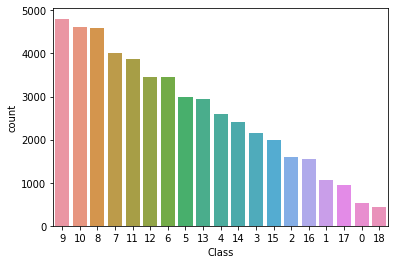

In [28]:
import seaborn as sns
ax = sns.countplot(x="Class", data=train_results, order = train_results['Class'].value_counts().index)